# Data-driven Modeling
From wikipedia: "Data-driven models are a class of computational models that primarily rely on historical data collected throughout a system's or process' lifetime to establish relationships between input, internal, and output variables."

Data-driven models are - at their highest level - <i>any</i> model that uses data to inform predictions.

Contrast this with purely physics-based models that use hypotheses, (or maybe even just guesses) to relate inputs to outputs.

## Motivation
As an example of these two regimes, suppose we want to make predictions about a simple variable $y(x)$

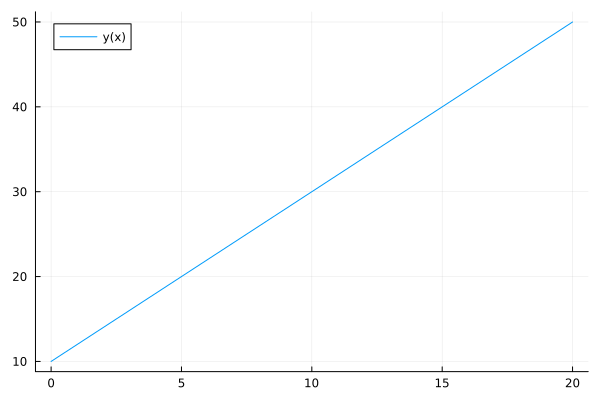

In [105]:
x = 0:0.25:20;
y(x) = 2x + 10;
using Plots, StatsBase
plot(x, y.(x), label="y(x)")

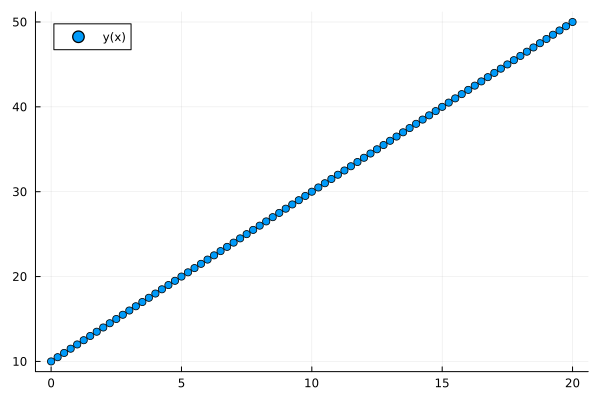

In [106]:
scatter(x, y.(x), label="y(x)")

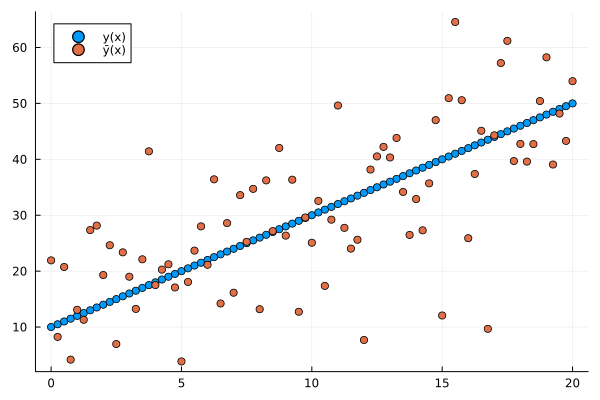

In [107]:
ȳ(x) = 2x + 10 + 10*randn()
scatter!(x, ȳ.(x), label="ȳ(x)")

In [108]:
mse(x,y) = mean((x.-y).^2)

mse (generic function with 1 method)

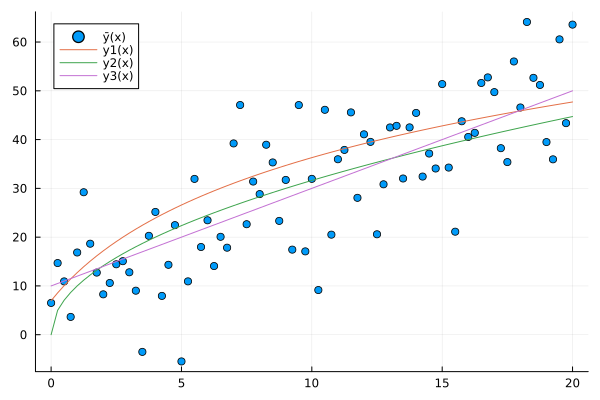

In [109]:
y1(x) = 20*log(x+3)-15;
y2(x) = 10*sqrt(x);
y3(x) = y(x)
scatter(x, ȳ.(x), label="ȳ(x)")
plot!(x, y1.(x), label="y1(x)")
plot!(x, y2.(x), label="y2(x)")
plot!(x, y3.(x), label="y3(x)")

In [110]:
println(mse(ȳ.(x),y1.(x)))
println(mse(ȳ.(x),y2.(x)))
println(mse(ȳ.(x),y.(x)))

159.4985803678823
127.39782591422009
106.6911472786849


Without any knowledge of physics, choosing between functional forms is usually an underdetermined problem, but without information of data, we are left to guess at the parameters of these functional forms.

## Linear Regression & Least Squares

$y = mx + b$ is equivalent to $y = Ax$ for an augmented $A = [m, b]$ and $x = [x, 1]$. To find $A$...TODO fill in

In [111]:
X = vcat([[1 x[i]] for i in 1:length(x)]...);
Y = ȳ.(x);
A = ((transpose(X)*X)^(-1))*transpose(X)*Y

2-element Vector{Float64}:
 8.187420747965817
 2.126973174624929

## Least Squares & Polynomial fit
We can generalize this process to fitting $n$th order polynomials by letting $X=[1, x_i, x_i^2, ..., x_i^N]$

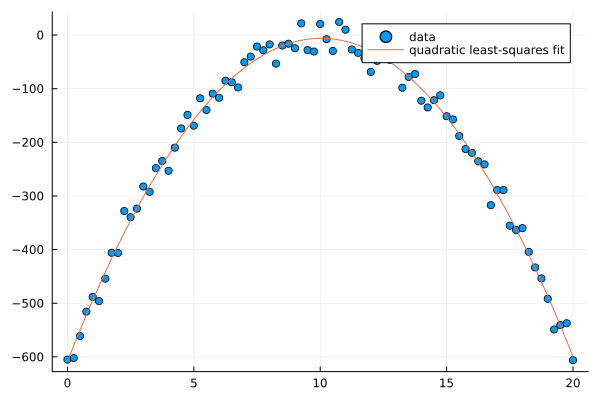

In [112]:
w(x) = -6*(x-10)^2+20*randn(); #-6x^2+120x-600
W = w.(x);
scatter(x,W, label="data")

X = vcat([[1 x[i] x[i]^2] for i in 1:length(x)]...);
B = ((transpose(X)*X)^(-1))*transpose(X)*W
plot!(x,X*B, label="quadratic least-squares fit")

## Maximum Likelihood Estimation

## Timeseries Learning